In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00


In [3]:
import csv
import random
from faker import Faker

# Faker for random data
fake = Faker()

# Breed IDs( I added all 4 animal types in one)
breed_data = {
    1: "German Shepherd",
    2: "Bulldog",
    3: "Golden Retriever",
    4: "Dalmatian",
    5: "Chihuahua",
    6: "Husky",
    7: "Persian Cat",
    8: "Bengal Cat",
    9: "British Shorthair",
    10: "Bombay Cat",
    11: "Siberian Cat",
    12: "Cockatiels",
    13: "Parrotlets",
    14: "Budgies",
    15: "Hyacinth Macaws",
    16: "Cockatoos",
    17: "Gold Fish",
    18: "Tortoise",
    19: "Oscar",
    20: "Guppies",
    21: "Platies"
}

# Function for animal data
def generate_animal_data(num_records):
    data = []
    for _ in range(num_records):
        animal_id = fake.unique.random_number(digits=3)
        shelter_id = random.randint(1, 5)
        animal_type = random.choice([1, 2, 3, 4 ])  # this is animal type: 1=Dog, 2=Cat, 3=Bird 4 = Fish
        breed_id = random.choice(list(breed_data.keys()))
        age = random.randint(1, 15)
        rate = random.randint(1, 5)
        gender = random.choice(['Male', 'Female'])
        colour = fake.color_name()[:15]
        cage_size = random.choice(['XS', 'S', 'M', 'L'])
        height = round(random.uniform(0.25, 0.80), 2)
        weight = round(random.uniform(0.2, 25.0), 2)

        data.append([animal_id, shelter_id, animal_type, breed_id, age, rate, gender, colour, cage_size, height, weight])

    return data

# For 1000 records
animal_data = generate_animal_data(1000)

# CSV
csv_file = 'animals_data.csv'
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'shelter_id', 'type', 'breed_type', 'age', 'rate', 'gender', 'colour', 'cage_size', 'height', 'weight'])
    writer.writerows(animal_data)

print(f"CSV file '{csv_file}' generated successfully!")


CSV file 'animals_data.csv' generated successfully!


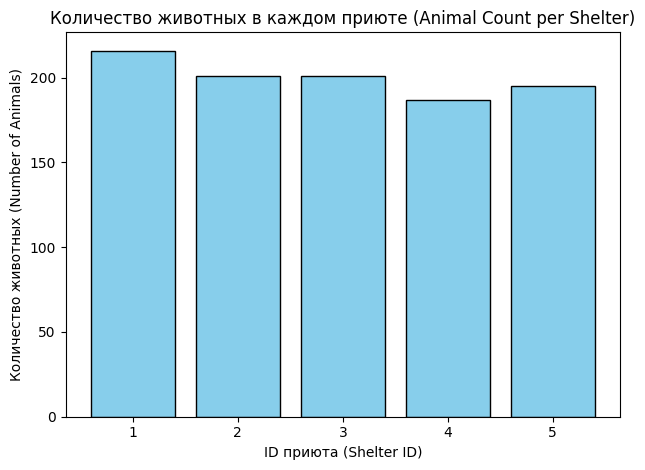

In [16]:
#This part is just for checking.
import matplotlib.pyplot as plt

# Shelter IDs and the number of animals in each shelter
shelter_ids = [1, 2, 3, 4, 5]
animal_counts = [216, 201, 201, 187, 195]

plt.bar(shelter_ids, animal_counts, color='skyblue', edgecolor='black')

plt.xlabel('ID приюта (Shelter ID)')
plt.ylabel('Количество животных (Number of Animals)')
plt.title('Количество животных в каждом приюте (Animal Count per Shelter)')

# Show the chart
plt.xticks(shelter_ids)
plt.tight_layout()
plt.show()

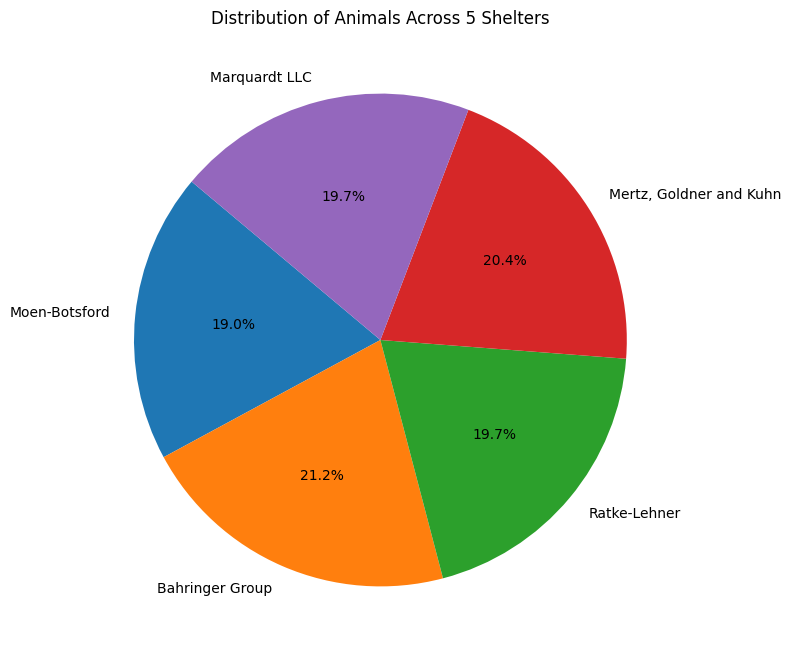

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

shelter_data = pd.read_csv("/content/shelter.csv")
animal_data = pd.read_csv("/content/animals_data.csv")

# Group animals by shelter_id and calculate the count
animal_count = animal_data.groupby('shelter_id').size().reset_index(name='animal_count')

# Merge with shelter data to get shelter names
shelter_animal_data = pd.merge(animal_count, shelter_data, left_on='shelter_id', right_on='id')

# Calculate total number of shelters
total_shelters = shelter_animal_data.shape[0]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(shelter_animal_data['animal_count'],
        labels=shelter_animal_data['name'],
        autopct='%1.1f%%',
        startangle=140)

plt.title(f"Distribution of Animals Across {total_shelters} Shelters")
plt.show()

Index(['id', 'shelter_id', 'type', 'breed_type', 'age', 'rate', 'gender',
       'colour', 'cage_size', 'height', 'weight'],
      dtype='object')


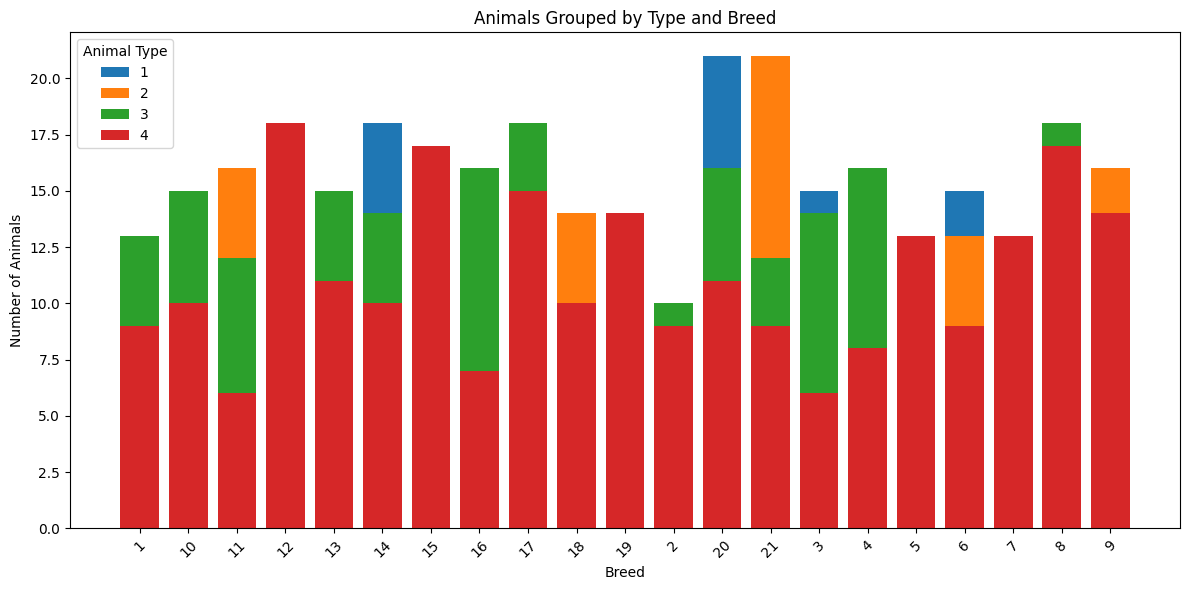

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

animal_data = pd.read_csv("/content/animals_data (2).csv")

print(animal_data.columns)

# If columns are correct, drop rows with missing values
animal_data = animal_data.dropna(subset=['type', 'breed_type'])

# Ensure 'type' and 'breed_type' are of string type
animal_data['type'] = animal_data['type'].astype(str)
animal_data['breed_type'] = animal_data['breed_type'].astype(str)

# Group by 'type' and 'breed_type' and count
animal_grouped = animal_data.groupby(['type', 'breed_type']).size().reset_index(name='count')

# Bar Chart
plt.figure(figsize=(12, 6))
for animal_type in animal_grouped['type'].unique():
    subset = animal_grouped[animal_grouped['type'] == animal_type]
    plt.bar(subset['breed_type'], subset['count'], label=animal_type)

plt.title('Animals Grouped by Type and Breed')
plt.xlabel('Breed')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.legend(title='Animal Type')
plt.tight_layout()
plt.show()


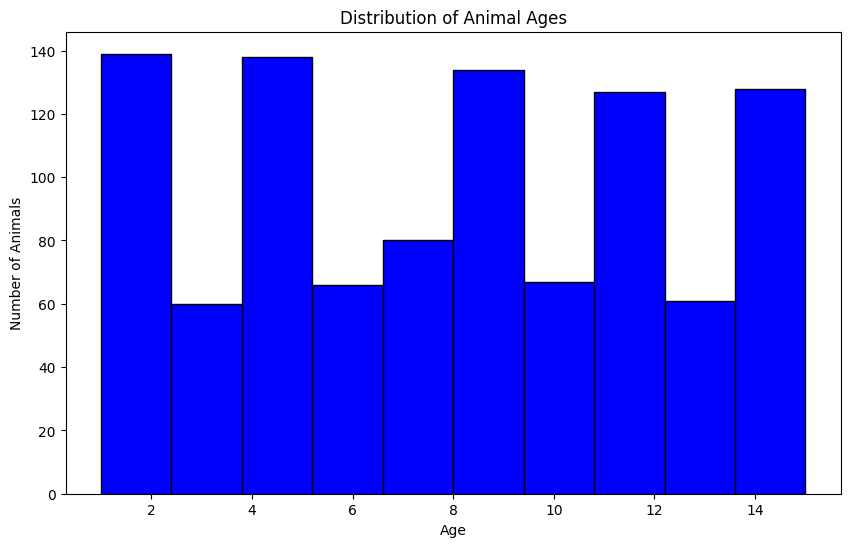

In [17]:
# This part is also for checking process.
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
animal_data = pd.read_csv("/content/animals_data (2).csv")

# Create Histogram for age distribution of animals
plt.figure(figsize=(10, 6))
plt.hist(animal_data['age'], bins=10, color='blue', edgecolor='black')
plt.title("Distribution of Animal Ages")
plt.xlabel("Age")
plt.ylabel("Number of Animals")
plt.show()